In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression


In [2]:

# df = pd.read_csv()
# Insert your file path for the all_seasons.csv https://www.kaggle.com/datasets/justinas/nba-players-data


In [3]:


# file_path = 
# Insert your file path for the country_code.csv https://www.kaggle.com/datasets/koki25ando/country-code


# Read the CSV file
country_code = pd.read_csv(file_path, index_col=0)


In [4]:
country_codes = country_code[['Country_name', 'code_3digit']]
country_codes = country_codes.rename({'Country_name': 'country'}, axis=1) 
country_codes['country'] = country_codes['country'].replace({'United States of America': 'USA', 'Russian Federation':'Russia',
                                                             'Venezuela (Bolivarian Republic)':'Venezuela', 'Korea (South)':'South Korea',
                                                             'Tanzania, United Republic of':'Tanzania','Macedonia, Republic of':'Macedonia',
                                                             'Congo, (Kinshasa)':'Democratic Republic of the Congo',
                                                             'Congo (Brazzaville)':'Congo','Iran, Islamic Republic of':'Iran',
                                                             'Virgin Islands, US':'US Virgin Islands',
                                                             })


# Fix country names
df['country'] = df['country'].replace({'Great Britain':'United Kingdom','England':'United Kingdom','Scotland':'United Kingdom',
                                       'Bosnia & Herzegovina':'Bosnia and Herzegovina','Bosnia':'Bosnia and Herzegovina',
                                       'Cabo Verde':'Cape Verde','St. Vincent & Grenadines':'Saint Vincent and Grenadines'})

In [5]:
df2 = df.drop(['team_abbreviation', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'season'], axis = 1)

In [6]:
fig = go.Figure(data=go.Scatter(x=df2['player_weight'],
                                y=df2['player_height'],
                                mode='markers',
                                text=df2['player_name'],
                                marker=dict(color='#17408b')
                                ))

fig.update_layout(
    title='NBA Player Height and Weight (for interactive exploration)',
    xaxis_title='Weight (kg)',
    yaxis_title='Height (cm)',
    plot_bgcolor='rgba(0,0,0,0)'
)
fig.show()

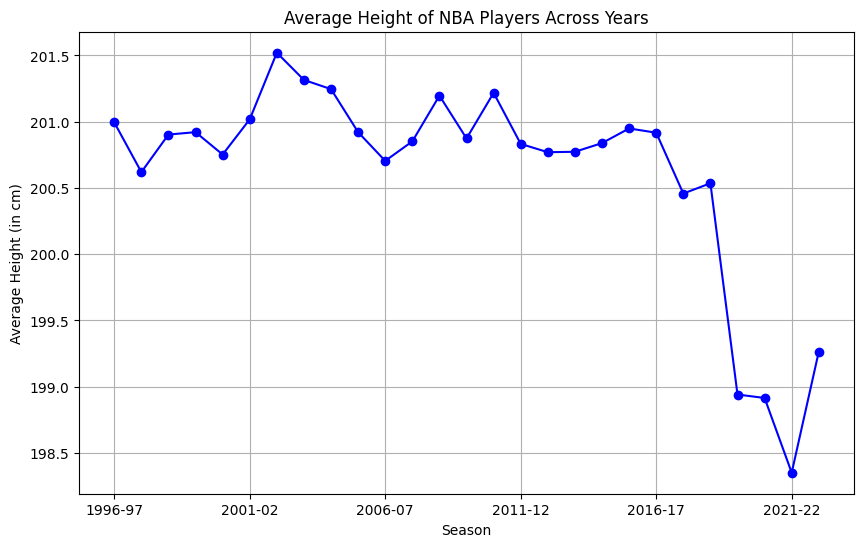

In [7]:


# Grouping the data by 'year' and calculating the average height for each year
average_height_by_year = df.groupby('season')['player_height'].mean()

# Plotting average height across years
plt.figure(figsize=(10, 6))
average_height_by_year.plot(kind='line', marker='o', color='blue')

plt.title('Average Height of NBA Players Across Years')
plt.xlabel('Season')
plt.ylabel('Average Height (in cm)')
plt.grid(True)
plt.show()

In [8]:


relevant_fields = df[['player_name', 'player_height', 'player_weight', 'country', 'season']]
player_first_season = relevant_fields.loc[relevant_fields.groupby(['player_name']).season.idxmin()]

df_map = player_first_season.groupby('country', as_index=False).agg(
                                                                          {'player_height': 'mean', 'player_weight':'mean', 'player_name':'count'}
                                                                          ).rename({'player_name': 'count'}, axis=1)


df_map = pd.merge(df_map, country_codes, how='inner', on='country')

# Choropleth map creation
height_map = go.Choropleth(
    locations=df_map['code_3digit'],
    z=df_map['player_height'],
    text=df_map['country'],
    colorscale='reds',
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_title='Player Height (cm)'
)

data = [height_map]

layout = dict(
    title='Average NBA Player Height by Country',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    margin=dict(l=0, r=0, b=0),
    height=500
)

fig = dict(data=data, layout=layout)

plotly.offline.iplot(fig)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Extracting features (height) and target (points)
X = df2['player_height'].values.reshape(-1, 1)
y = df2['pts']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Creating and fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting points based on heights in the test set
predictions = model.predict(X_test)

# Evaluate the model's performance using R-squared
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")

# Predicting points for a specific height (for example, 200 cm)
specific_height = [[200]]
predicted_points = model.predict(specific_height)
print(f"Predicted points for height 200 cm: {predicted_points[0]}")


R-squared: 0.0012663214992446603
Predicted points for height 200 cm: 8.36730145649654


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Extracting features and target
X = df2['player_height'].values.reshape(-1, 1)
y = df2['pts']

# Define a range of degrees to test
degrees = range(1, 50)  # You can adjust the range as needed

# Lists to store mean cross-validation scores
mean_scores = []

# Perform cross-validation for each degree
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    poly_model = LinearRegression()
    scores = cross_val_score(poly_model, X_poly, y, cv=5, scoring='r2')  # Using R-squared as a metric
    mean_scores.append(scores.mean())

# Find the degree with the highest mean cross-validation score
best_degree = degrees[np.argmax(mean_scores)]
print(f"Best degree: {best_degree}")

Best degree: 3


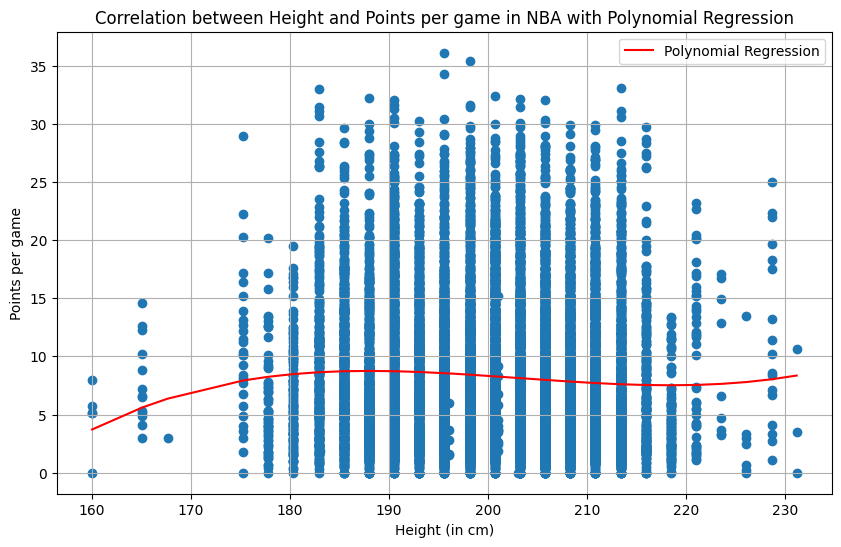

In [11]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data preparation
X = df2['player_height'].values.reshape(-1, 1)
y = df2['pts']

# Polynomial features transformation
poly = PolynomialFeatures(degree=3)  
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict assists using the height data
predictions = poly_model.predict(X_poly)

# Sort X and predictions for better visualization
sort_axis = np.argsort(X.flatten())
X_sorted = X[sort_axis]
predictions_sorted = predictions[sort_axis]

# Plotting the polynomial regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X_sorted, predictions_sorted, color='red', label='Polynomial Regression')

plt.xlabel('Height (in cm)')
plt.ylabel('Points per game')
plt.title('Correlation between Height and Points per game in NBA with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


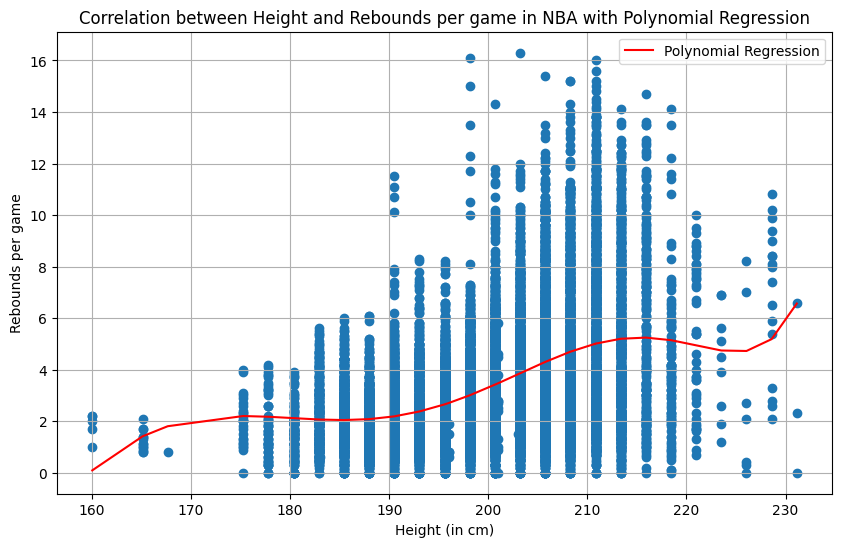

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data preparation
X = df2['player_height'].values.reshape(-1, 1)
y = df2['reb']

# Polynomial features transformation
poly = PolynomialFeatures(degree=12)  
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict assists using the height data
predictions = poly_model.predict(X_poly)

# Sort X and predictions for better visualization
sort_axis = np.argsort(X.flatten())
X_sorted = X[sort_axis]
predictions_sorted = predictions[sort_axis]

# Plotting the polynomial regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X_sorted, predictions_sorted, color='red', label='Polynomial Regression')

plt.xlabel('Height (in cm)')
plt.ylabel('Rebounds per game')
plt.title('Correlation between Height and Rebounds per game in NBA with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

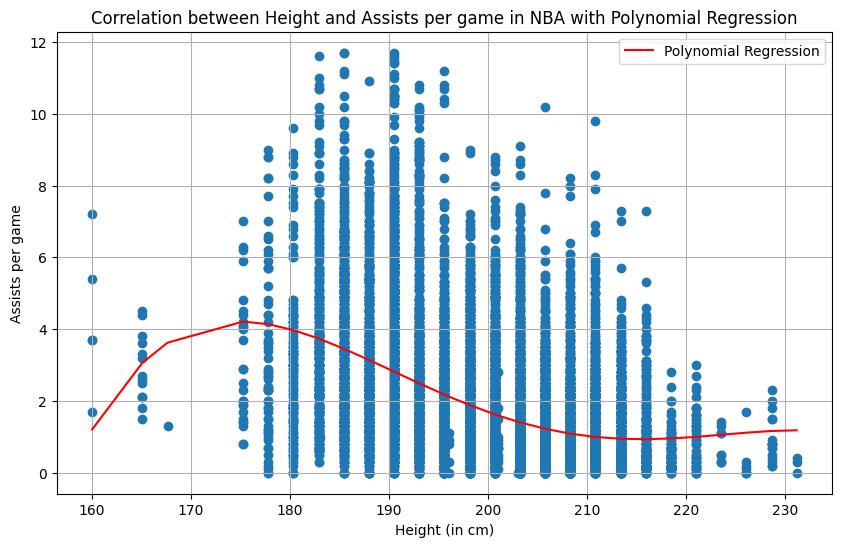

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Data preparation
X = df2['player_height'].values.reshape(-1, 1)
y = df2['ast']

# Polynomial features transformation
poly = PolynomialFeatures(degree=4)  
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict assists using the height data
predictions = poly_model.predict(X_poly)

# Sort X and predictions for better visualization
sort_axis = np.argsort(X.flatten())
X_sorted = X[sort_axis]
predictions_sorted = predictions[sort_axis]

# Plotting the polynomial regression line on the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.plot(X_sorted, predictions_sorted, color='red', label='Polynomial Regression')

plt.xlabel('Height (in cm)')
plt.ylabel('Assists per game')
plt.title('Correlation between Height and Assists per game in NBA with Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
df2['combined_metric'] = df2['pts'] + df2['reb'] + df2['ast']

Correlation coefficient (r value): -0.4427806132893139
R-squared value: 0.2133070089038127


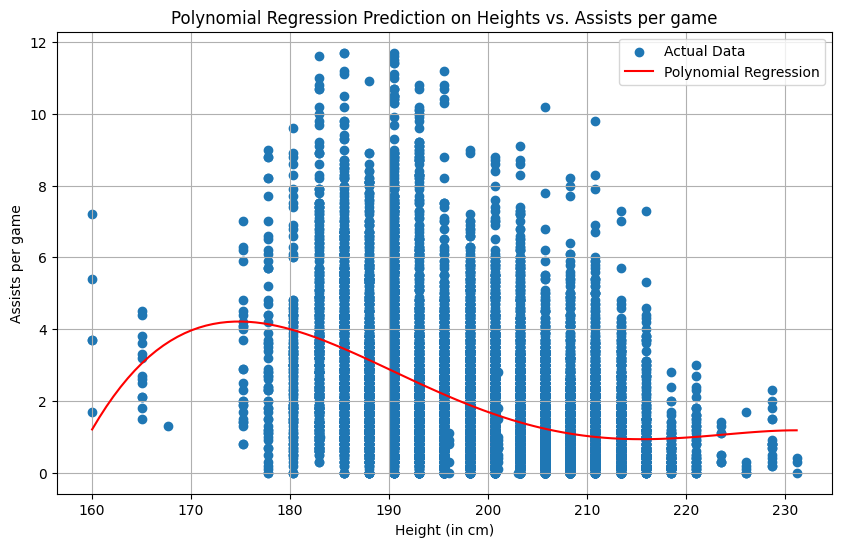

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data preparation (assuming df2 contains 'player_height' and 'ast' columns)
X = df2['player_height'].values.reshape(-1, 1)
y = df2['ast']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Assists per game')
plt.title('Polynomial Regression Prediction on Heights vs. Assists per game')
plt.legend()
plt.grid(True)
plt.show()


Correlation coefficient (r value): -0.055284243047987854
R-squared value: 0.004752922114175551


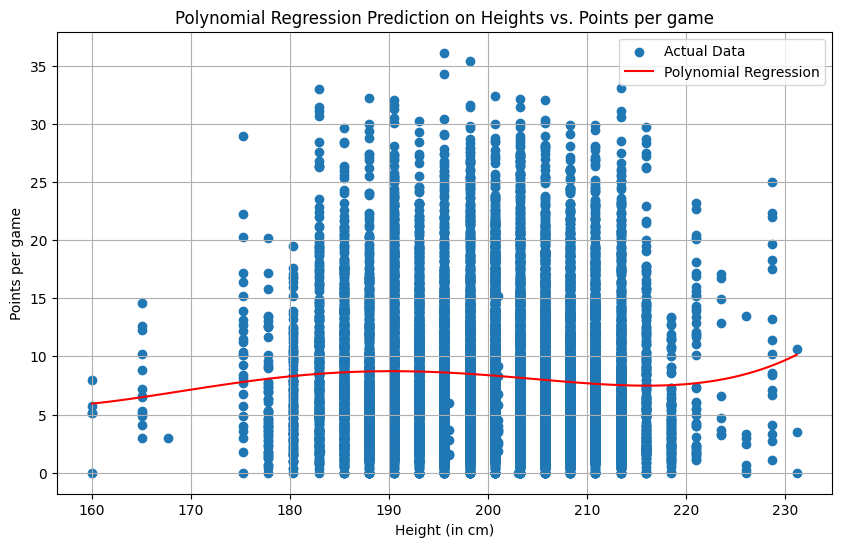

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data preparation (assuming df2 contains 'player_height' and 'ast' columns)
X = df2['player_height'].values.reshape(-1, 1)
y = df2['pts']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Points per game')
plt.title('Polynomial Regression Prediction on Heights vs. Points per game')
plt.legend()
plt.grid(True)
plt.show()

Correlation coefficient (r value): 0.4242204550057053
R-squared value: 0.19155957658869782


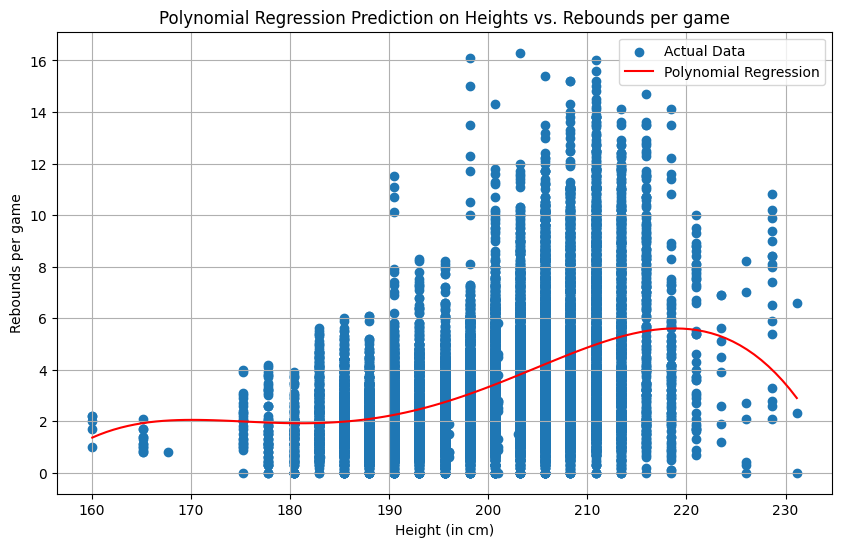

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data preparation (assuming df2 contains 'player_height' and 'ast' columns)
X = df2['player_height'].values.reshape(-1, 1)
y = df2['reb']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Rebounds per game')
plt.title('Polynomial Regression Prediction on Heights vs. Rebounds per game')
plt.legend()
plt.grid(True)
plt.show()

Correlation coefficient (r value): -0.00876908414029964
R-squared value: 0.0008436132956247677


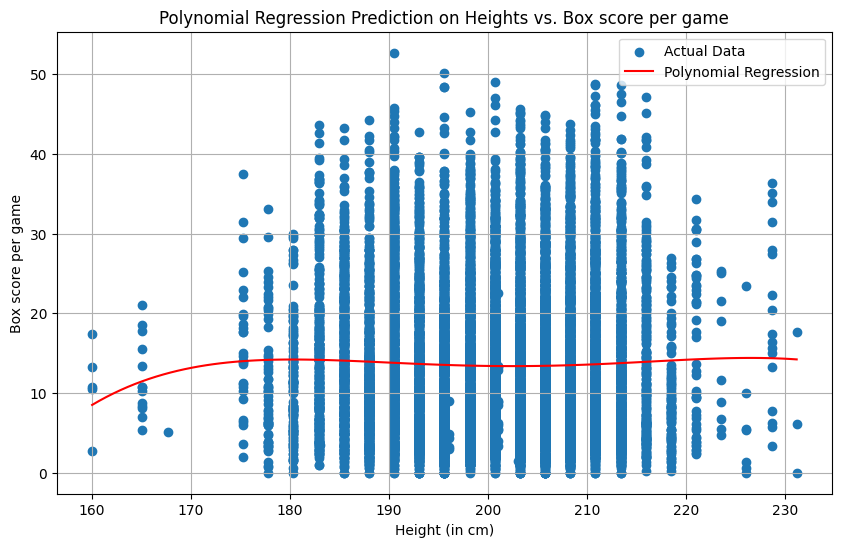

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Data preparation (assuming df2 contains 'player_height' and 'ast' columns)
X = df2['player_height'].values.reshape(-1, 1)
y = df2['combined_metric']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Box score per game')
plt.title('Polynomial Regression Prediction on Heights vs. Box score per game')
plt.legend()
plt.grid(True)
plt.show()

Correlation coefficient (r value): 0.529634556200931
R-squared value: 0.2990888197556365


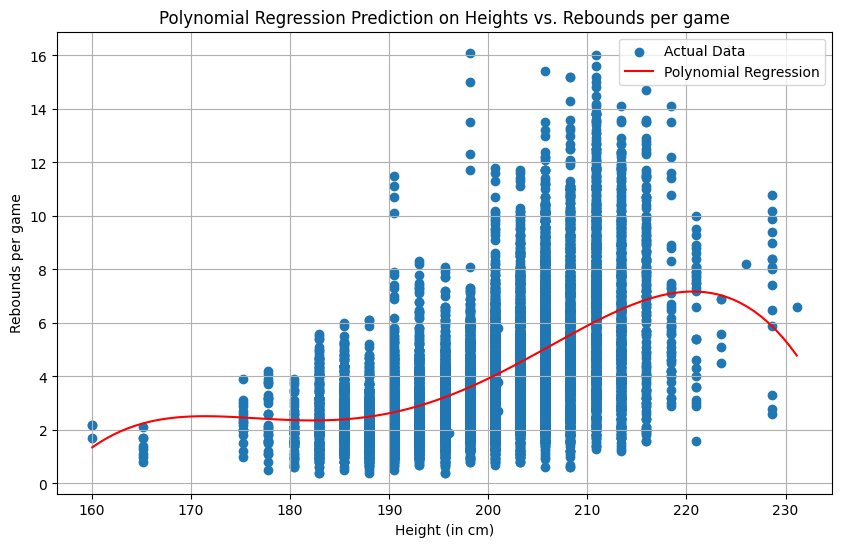

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df2 contains 'player_height', 'reb', and 'gp' columns
# Filter data where 'gp' is greater than 20
filtered_data = df2[df2['gp'] > 40]

# Data preparation using filtered data
X = filtered_data['player_height'].values.reshape(-1, 1)
y = filtered_data['reb']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Rebounds per game')
plt.title('Polynomial Regression Prediction on Heights vs. Rebounds per game')
plt.legend()
plt.grid(True)
plt.show()




Correlation coefficient (r value): -0.06162542536959718
R-squared value: 0.00658338614224574


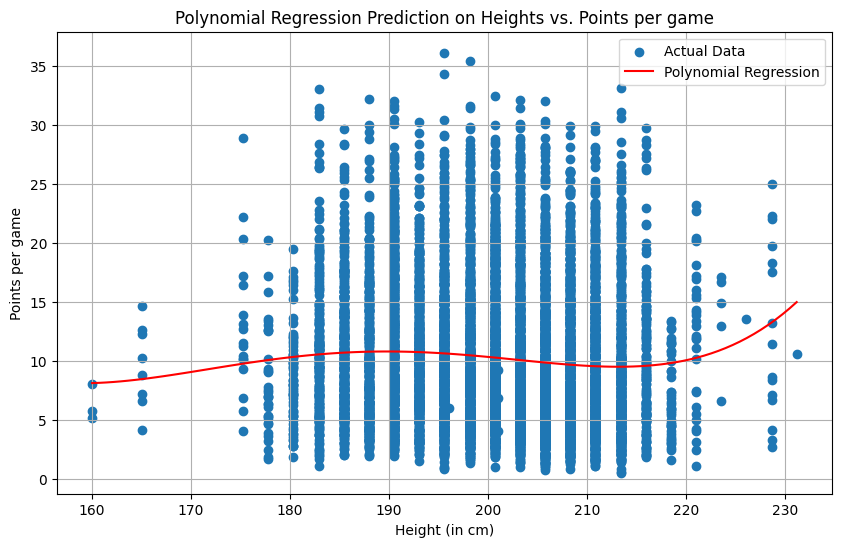

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df2 contains 'player_height', 'pts', and 'gp' columns
# Filter data where 'gp' is greater than 20
filtered_data = df2[df2['gp'] > 40]

# Data preparation using filtered data
X = filtered_data['player_height'].values.reshape(-1, 1)
y = filtered_data['pts']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Points per game')
plt.title('Polynomial Regression Prediction on Heights vs. Points per game')
plt.legend()
plt.grid(True)
plt.show()



Correlation coefficient (r value): -0.5015209967122278
R-squared value: 0.2747448534262724


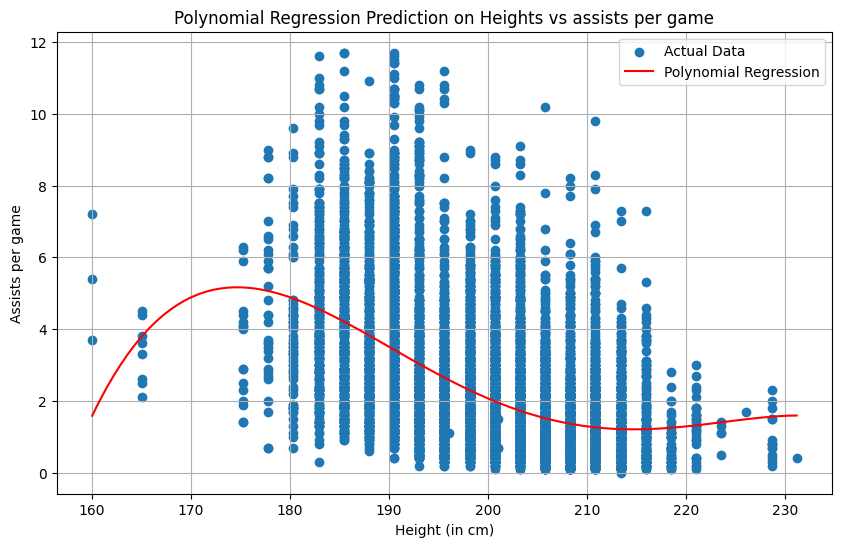

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df2 contains 'player_height', 'pts', and 'gp' columns
# Filter data where 'gp' is greater than 20
filtered_data = df2[df2['gp'] > 40]

# Data preparation using filtered data
X = filtered_data['player_height'].values.reshape(-1, 1)
y = filtered_data['ast']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Assists per game')
plt.title('Polynomial Regression Prediction on Heights vs assists per game')
plt.legend()
plt.grid(True)
plt.show()


Correlation coefficient (r value): -0.0009286471258235372
R-squared value: 0.002877233336409324


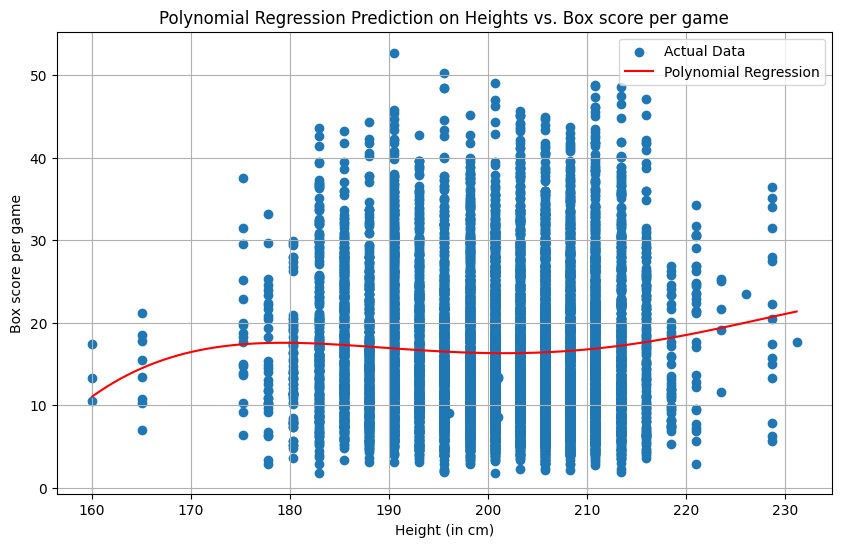

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df2 contains 'player_height', 'pts', and 'gp' columns
# Filter data where 'gp' is greater than 20
filtered_data = df2[df2['gp'] > 40]

# Data preparation using filtered data
X = filtered_data['player_height'].values.reshape(-1, 1)
y = filtered_data['combined_metric']

# Calculate correlation coefficient (r value)
r_value = np.corrcoef(X.flatten(), y)[0, 1]
print(f"Correlation coefficient (r value): {r_value}")

# Polynomial features transformation (degree 4 in this case)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Create and fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Predict for a range of heights
heights_to_predict = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_to_predict_poly = poly.transform(heights_to_predict)
predictions = poly_model.predict(X_to_predict_poly)

# Calculate R-squared
r_squared = r2_score(y, poly_model.predict(X_poly))
print(f"R-squared value: {r_squared}")

# Visualize the polynomial regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Actual Data')
plt.plot(heights_to_predict, predictions, color='red', label='Polynomial Regression')
plt.xlabel('Height (in cm)')
plt.ylabel('Box score per game')
plt.title('Polynomial Regression Prediction on Heights vs. Box score per game')
plt.legend()
plt.grid(True)
plt.show()


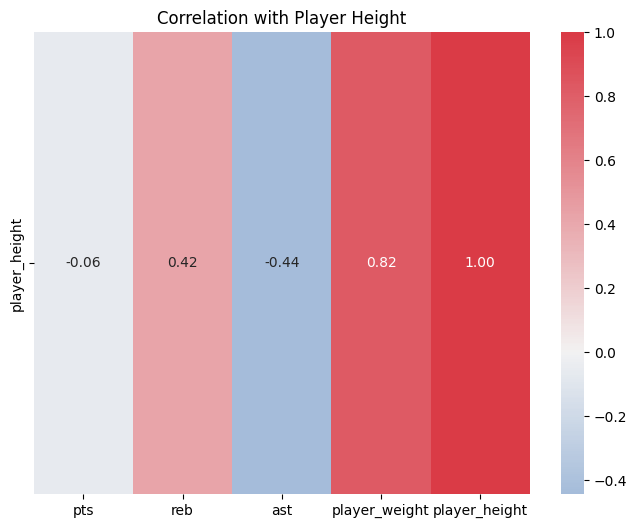

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Your DataFrame and computation
df_corr = df[df['season'] != '2019-01-01']
df_corr = df_corr[[ 'pts', 'reb', 'ast', 'player_weight', 'player_height']]

# Compute the correlation matrix
corr = df_corr.corr()

# Extract correlation values related to 'player_height'
height_corr = corr.loc[['player_height']]

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(250, 10, as_cmap=True)

# Draw the heatmap for 'player_height' correlations
sns.heatmap(height_corr, cmap=cmap, annot=True, fmt=".2f", center=0)

plt.title("Correlation with Player Height")
plt.show()

